In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df_train=pd.read_csv("./Train.csv")
df_test=pd.read_csv("./Test.csv")

In [132]:
print(df_train.shape)
print(df_test.shape)

(7000, 24)
(3000, 23)


In [133]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [135]:
df_train.isnull().sum().sort_values(ascending=False)[:5]

VAR4                 656
VAR2                 577
Age                  412
Time_of_service      144
Work_Life_balance     11
dtype: int64

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le=LabelEncoder()

In [138]:
columns=['Gender',
        'Relationship_Status',
        'Hometown',
        'Unit',
        'Decision_skill_possess',
        'Time_of_service',
        'Compensation_and_Benefits']

for col in columns:
    df_train[col]=le.fit_transform(df_train[col])

In [139]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.0,4,0,1,2,2,4,4,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,1,24.0,3,1,3,3,0,5,4,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,0,58.0,3,0,0,8,2,27,3,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,0,26.0,3,1,2,1,1,4,3,...,2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,0,31.0,1,0,3,3,2,5,4,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [140]:
for col in columns:
    df_test[col]=le.fit_transform(df_test[col])

In [141]:
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,0,32.0,5,1,3,9,2,7,4,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,1,65.0,2,1,2,2,3,41,2,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,1,52.0,3,0,3,10,3,21,3,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,1,50.0,5,1,4,4,0,11,4,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,0,44.0,3,0,1,9,2,12,4,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [142]:
Y_train=df_train['Attrition_rate']
employee_id=df_test['Employee_ID']

In [143]:
df_train.drop(columns=['Employee_ID','Attrition_rate'],axis=1,inplace=True)
df_test.drop(columns=['Employee_ID'],axis=1,inplace=True)

In [144]:
df_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,42.0,4,0,1,2,2,4,4,33,...,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,1,24.0,3,1,3,3,0,5,4,36,...,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,0,58.0,3,0,0,8,2,27,3,51,...,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,0,26.0,3,1,2,1,1,4,3,56,...,8.0,2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,0,31.0,1,0,3,3,2,5,4,62,...,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [145]:
df_test.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,1,3,9,2,7,4,30,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,1,2,2,3,41,2,72,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,0,3,10,3,21,3,25,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,1,4,4,0,11,4,28,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,0,1,9,2,12,4,47,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [222]:
df_train=df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_test.mean())

In [233]:
df_train=(df_train-df_train.mean())/df_train.std()
df_test=(df_test-df_test.mean())/df_test.std()
#Y_train=(Y_train-Y_train.mean())/Y_train.std()

In [234]:
X_train=df_train.values
Y_train=Y_train
X_test=df_test.values

In [225]:
X_train.shape

(7000, 19)

In [235]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [255]:
model=Sequential()
model.add(Dense(16,input_shape=(19,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 16)                320       
_________________________________________________________________
dropout_60 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_61 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_62 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_96 (Dense)             (None, 1)               

In [256]:
adam=Adam(lr=0.0003)

In [257]:
model.compile(optimizer=adam,loss='mean_squared_error')

In [258]:
hist=model.fit(X_train,
              Y_train,
              epochs=20,
              batch_size=64,
              validation_split=0.2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/20
5600/5600 [==============================] - 0s 59us/step - loss: 0.4253 - val_loss: 0.1325
Epoch 2/20
5600/5600 [==============================] - 0s 25us/step - loss: 0.1971 - val_loss: 0.0821
Epoch 3/20
5600/5600 [==============================] - 0s 30us/step - loss: 0.1342 - val_loss: 0.0654
Epoch 4/20
5600/5600 [==============================] - 0s 29us/step - loss: 0.1016 - val_loss: 0.0576
Epoch 5/20
5600/5600 [==============================] - 0s 23us/step - loss: 0.0821 - val_loss: 0.0531
Epoch 6/20
5600/5600 [==============================] - 0s 23us/step - loss: 0.0690 - val_loss: 0.0510
Epoch 7/20
5600/5600 [==============================] - 0s 24us/step - loss: 0.0595 - val_loss: 0.0490
Epoch 8/20
5600/5600 [==============================] - 0s 24us/step - loss: 0.0550 - val_loss: 0.0474
Epoch 9/20
5600/5600 [==============================] - 0s 23us/step - loss: 0.0513 - val_loss: 0.0464
Epoch 10/20
5600/5600 [==

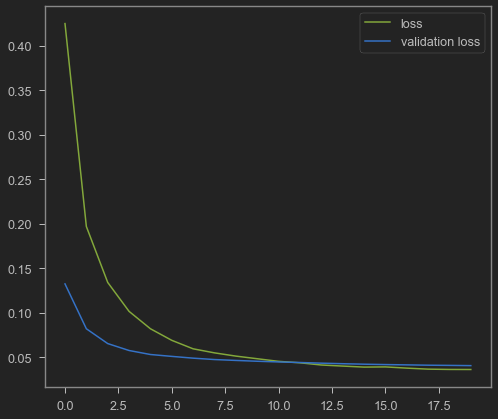

In [259]:
plt.plot(hist.history['loss'],'g',label='loss')
plt.plot(hist.history['val_loss'],'b',label='validation loss')

plt.legend()

In [260]:
prediction=model.predict(X_test)
prediction=prediction.reshape((-1,))

In [261]:
temp=pd.DataFrame({'Employee_ID':employee_id,'Attrition_rate':prediction})
temp.to_csv('neural_network.csv',index=False)   # 81% accuracy